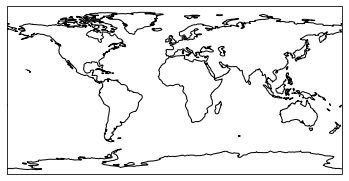

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Save the plot by calling plt.savefig() BEFORE plt.show()
plt.savefig('coastlines.pdf')
plt.savefig('coastlines.png')

plt.show()

<ipython-input-19-5e40c441a997>:6: DeprecationWarning: This method has been deprecated. Please use `add_feature` instead.
  ax.natural_earth_shp()


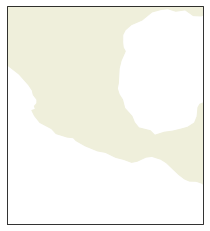

In [19]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
#ax.stock_img()
ax.natural_earth_shp()
ax.set_extent((-108,-90,10,30))
plt.show()

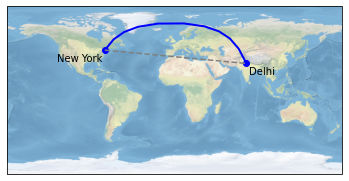

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

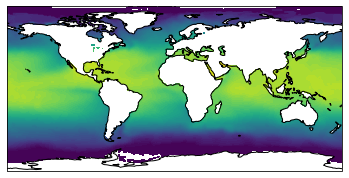

In [5]:
import os
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import numpy as np

from cartopy import config
import cartopy.crs as ccrs


# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'netcdf', 'HadISST1_SST_update.nc'
                     )

dataset = netcdf_dataset(fname)
sst = dataset.variables['sst'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, sst, 60,
             transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()

In [7]:
import iris
import iris_sample_data
import matplotlib.pyplot as plt

import cartopy.crs as ccrs


# load some sample iris data
fname = iris.sample_data_path('rotated_pole.nc')
temperature = iris.load_cube(fname)

# iris comes complete with a method to put bounds on a simple point
# coordinate. This is very useful...
temperature.coord('grid_latitude').guess_bounds()
temperature.coord('grid_longitude').guess_bounds()

# turn the iris Cube data structure into numpy arrays
gridlons = temperature.coord('grid_longitude').contiguous_bounds()
gridlats = temperature.coord('grid_latitude').contiguous_bounds()
temperature = temperature.data

# set up a map
ax = plt.axes(projection=ccrs.PlateCarree())

# define the coordinate system that the grid lons and grid lats are on
rotated_pole = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)
plt.pcolormesh(gridlons, gridlats, temperature, transform=rotated_pole)

ax.coastlines()

plt.show()

ModuleNotFoundError: No module named 'iris'

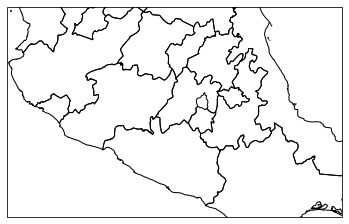

In [83]:
# Este es el que se esta usando en mapper.py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

fname = 'F:\\jupyter\\shapefiles\\st_mx.shp'

ax = plt.axes(projection=ccrs.Robinson())
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none', edgecolor='black')
ax.set_extent((-105,-95,16,22))

ax.add_feature(shape_feature)
plt.show()

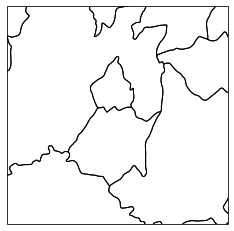

In [79]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader

fname = 'F:\\jupyter\\data\\MEX_adm1.shp'

ax = plt.axes(projection=ccrs.Robinson())
ax.add_geometries(Reader(fname).geometries(),
                  ccrs.PlateCarree(),
                  facecolor='none', edgecolor='black')
ax.set_extent((-100,-98,18,20))
plt.show()